In [3]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [12]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])

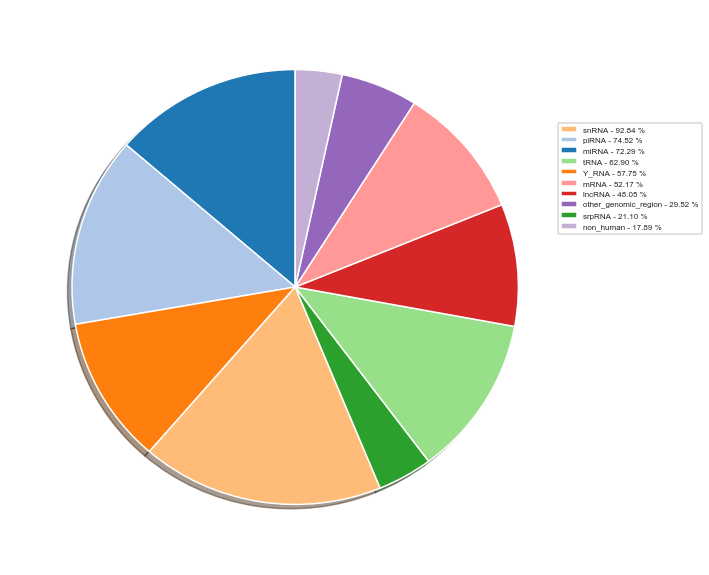

In [15]:
colours = tableau20[:len(x)]/255.
x = rnanames
y = np.random.random((10,))
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(10,10))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

In [22]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[0])

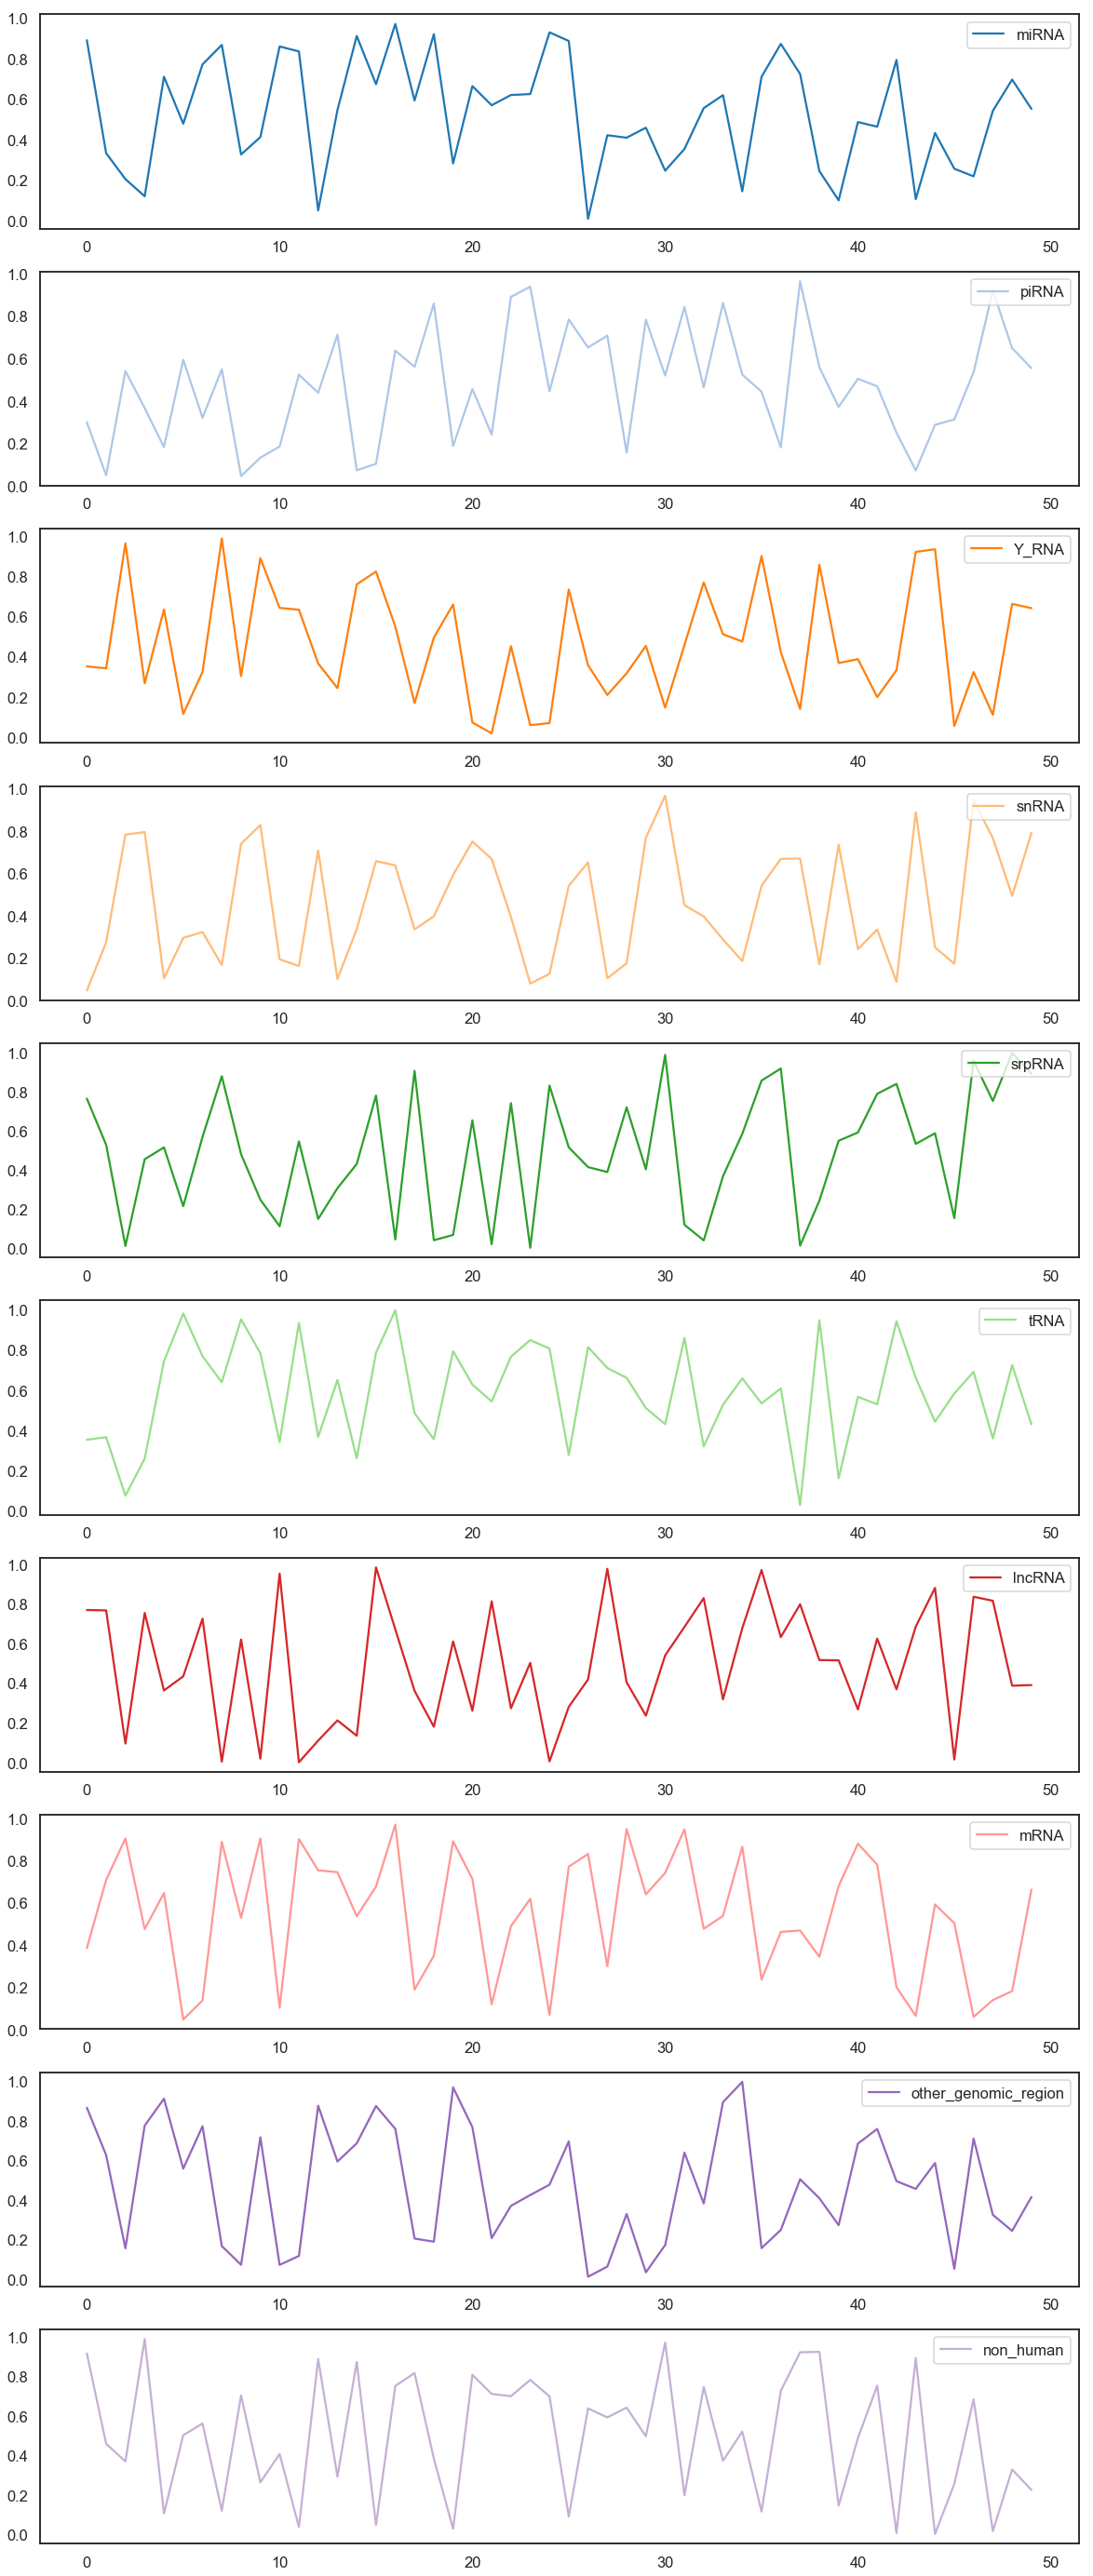

In [33]:
length = np.random.random((10,50))
fig,ax=plt.subplots(10,1,figsize=(20,50))
for i in range(length.shape[0]):
    ax[i].plot(length[i],label=rnanames[i],color=colours[i])
    ax[i].legend(loc='upper right')

[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%'),
 Text(0,0,u'90.0%')]

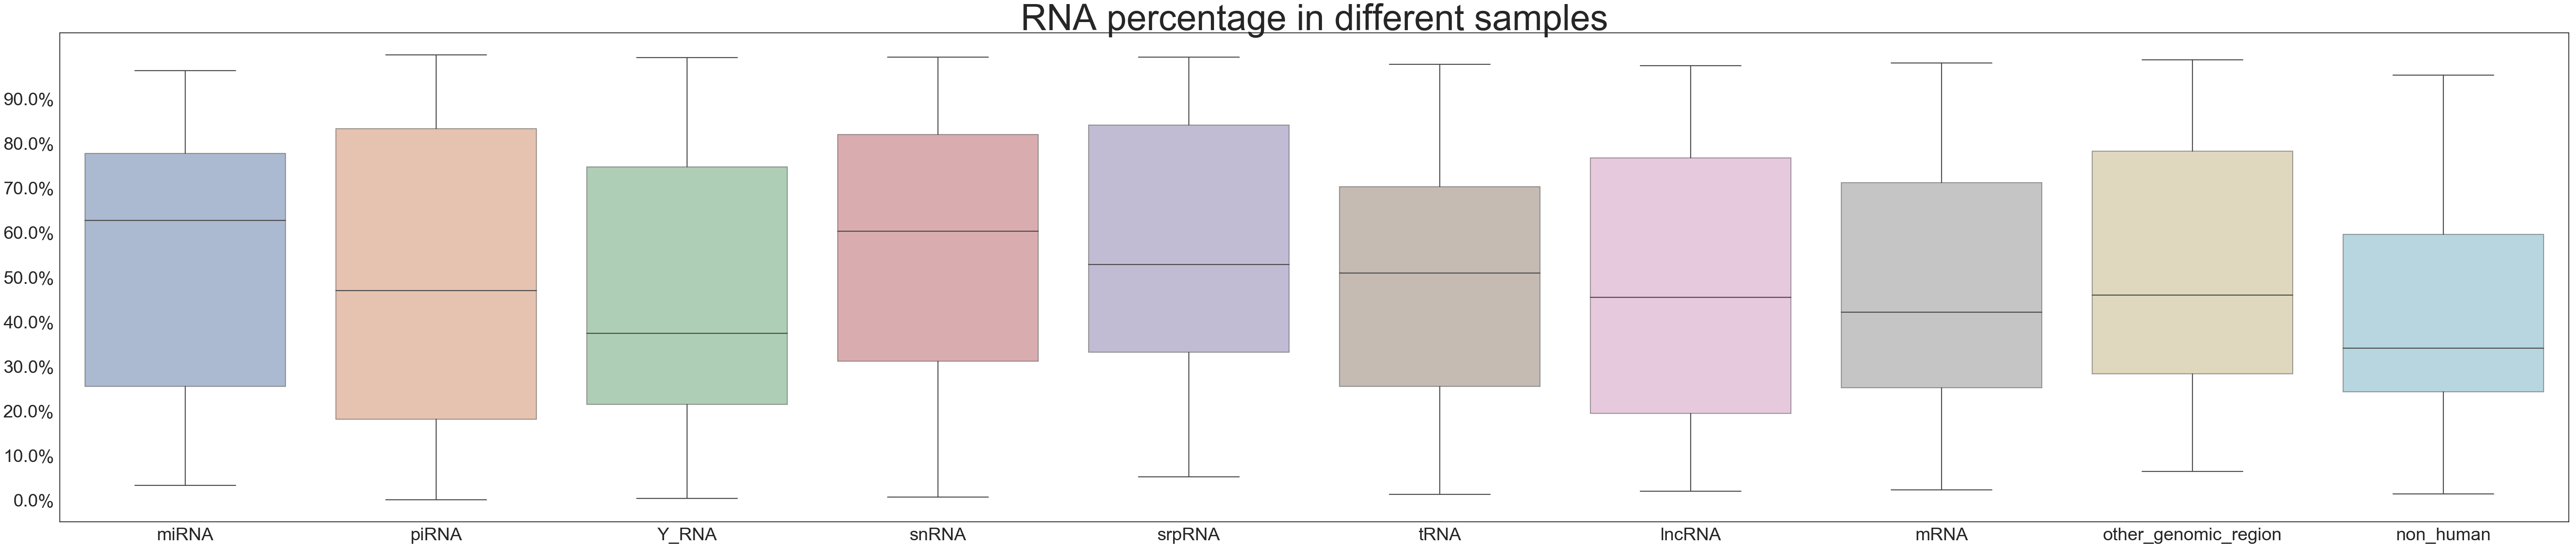

In [30]:
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =np.random.random((50,10)),ax=ax,boxprops=dict(alpha=.5))
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)